# Proyek Analisis Data: E-commerce-public-dataset
- **Nama:** Nafisah Aliyah Khumaini
- **Email:** nafisahaliyah01@gmail.com
- **ID Dicoding:** pichaachuu

## Menentukan Pertanyaan Bisnis

- Di kota dan wilayah apa customer tersebar
- Di kota dan wilayah apa seller tersebar

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

1. load tabel customer

In [2]:
customer_df = pd.read_csv("https://raw.githubusercontent.com/pichaachuu/proyek_analisis_ecommerce/refs/heads/main/data/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


2. load tabel seller

In [3]:
seller_df = pd.read_csv("https://raw.githubusercontent.com/pichaachuu/proyek_analisis_ecommerce/refs/heads/main/data/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


3. load tabel geolocation

In [4]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/pichaachuu/proyek_analisis_ecommerce/refs/heads/main/data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- tabel customer kolomnya berisi customer id, customer unique code, customer zip code, customer city, dan customer state
- tabel seller kolomnya berisi seller id, seller zip code, seller city, dan seller state

### Assessing Data

1. Menilai data customer_df
- memeriksa tipe data dan kolom yang terdapat dalam customers_df

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- memeriksa jumlah duplikasi dan melihat ringkasan statistik deskriptif

In [6]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())
customer_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


2. Menilai data seller_df
- memeriksa tipe data dan kolom yang terdapat pada data seller_df

In [7]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


- memeriksa jumlah duplikasi dan melihat ringkasan statistik deskriptif data seller_df

In [8]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())
seller_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


3. Memeriksa data geolocation_df
- memeriksa tipe data dan kolom yang terdapat pada geolocation_df

In [9]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


- memeriksa jumlah duplikasi dan melihat ringkasan statistik deskriptif pada data geolocation_df

In [10]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- Dari data customer_df = data bertipe int64 sebanyak 1, data bertipe object sebanyak 4, tidak ada missing values, tidak ada duplikasi data
- Dari data seller_df = data bertipe int64 sebanyak 1, data bertipe object sebanyak 3, tidak ada missing value, tidak ada duplikasi data
- Dari data geolocation_df = data bertipe float64 sebanyak 2, bertipe int64 sebanyak 1, bertipe object sebanyak 2, tidak ada missing value, ada duplikasi sebanyak 261831

### Cleaning Data

1. menghilangkan duplicate data pada geolocation_df

In [11]:
geolocation_df.drop_duplicates(inplace=True)

cek apakah masih ada duplikasi data

In [12]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Menghapus duplikasi data agar data lebih akurat

## Exploratory Data Analysis (EDA)

### Explore ...

1. Persebran customer berdasarkan kota (city) dan negara bagian (state)

In [13]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo             15540
rio de janeiro         6882
belo horizonte         2773
brasilia               2131
curitiba               1521
                      ...  
ponto novo                1
populina                  1
porteiras                 1
portela                   1
pitanga de estrada        1
Name: customer_id, Length: 4119, dtype: int64

In [14]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

2. Persebaran seller berdasarkan kota (city) dan negara bagian (state)

In [15]:
seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo          694
curitiba           127
rio de janeiro      96
belo horizonte      68
ribeirao preto      52
                  ... 
tambau               1
taruma               1
teixeira soares      1
teresina             1
sp / sp              1
Name: seller_id, Length: 611, dtype: int64

In [16]:
seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AM       1
AC       1
PI       1
MA       1
PA       1
Name: seller_id, dtype: int64

3. Persiapan untuk dashboard

- untuk customer

In [17]:
customer_counts = customer_df.groupby(by="customer_zip_code_prefix").size().reset_index(name='n_customers')

customer_geo = geolocation_df.merge(
    customer_counts,
    left_on='geolocation_zip_code_prefix',
    right_on='customer_zip_code_prefix',
    how='left'
)

customer_geo['n_customers'] = customer_geo['n_customers'].fillna(0)

- untuk seller

In [18]:
seller_counts = seller_df.groupby(by='seller_zip_code_prefix').size().reset_index(name='n_sellers')

final_data = customer_geo.merge(
    seller_counts,
    left_on='geolocation_zip_code_prefix',
    right_on='seller_zip_code_prefix',
    how='left'
)

final_data['n_sellers'] = final_data['n_sellers'].fillna(0)

simpan file untuk dashboard

In [25]:
final_data.to_csv('main.csv', index=False)

**Insight:**
- Persebaran customer tertinggi ada di kota Sao Paulo dan di negara bagian SP
- Persebaran seller tertinggi ada di kota Sao Paulo dan di negara bagian SP

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Persebaran Customer Berdasarkan Kota

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_66140\3235322444.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


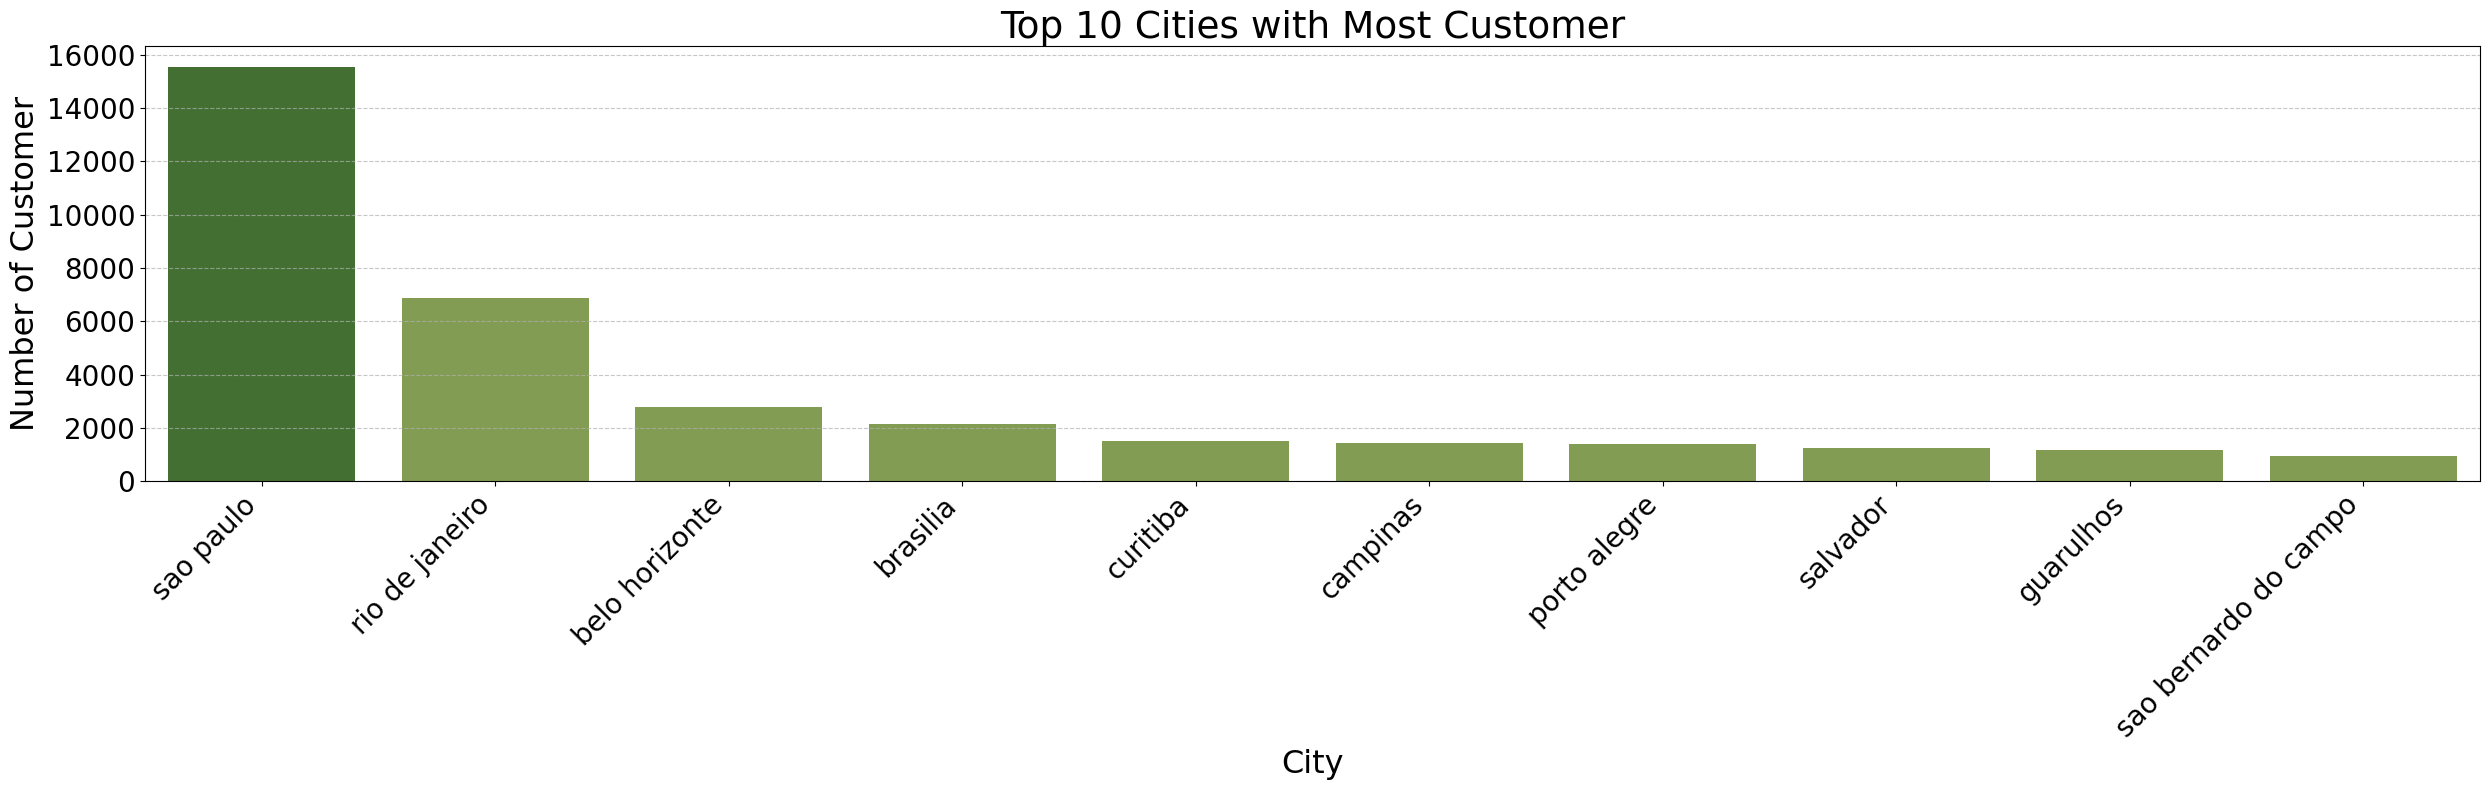

In [76]:
bycustomer_city_df = customer_df.groupby(by="customer_city").customer_id.nunique().reset_index()

bycustomer_city_df.rename(columns={ "customer_id": "customer_count" }, inplace=True)

# Mengambil 10 kota dengan jumlah penjual terbanyak
top_cities = bycustomer_city_df.sort_values(by="customer_count", ascending=False).head(10)

plt.figure(figsize=(25, 8))

colors_ = ["#3E7B27"] + ["#85A947"] * 9

sns.barplot(
    x="customer_city",
    y="customer_count",
    data=top_cities,
    palette=colors_
)

plt.title("Top 10 Cities with Most Customer", loc="center", fontsize=27)
plt.xlabel("City", fontsize=23)
plt.ylabel("Number of Customer", fontsize=23)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()


Persebaran Customer berdasarkan negara bagian

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_66140\2898785835.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


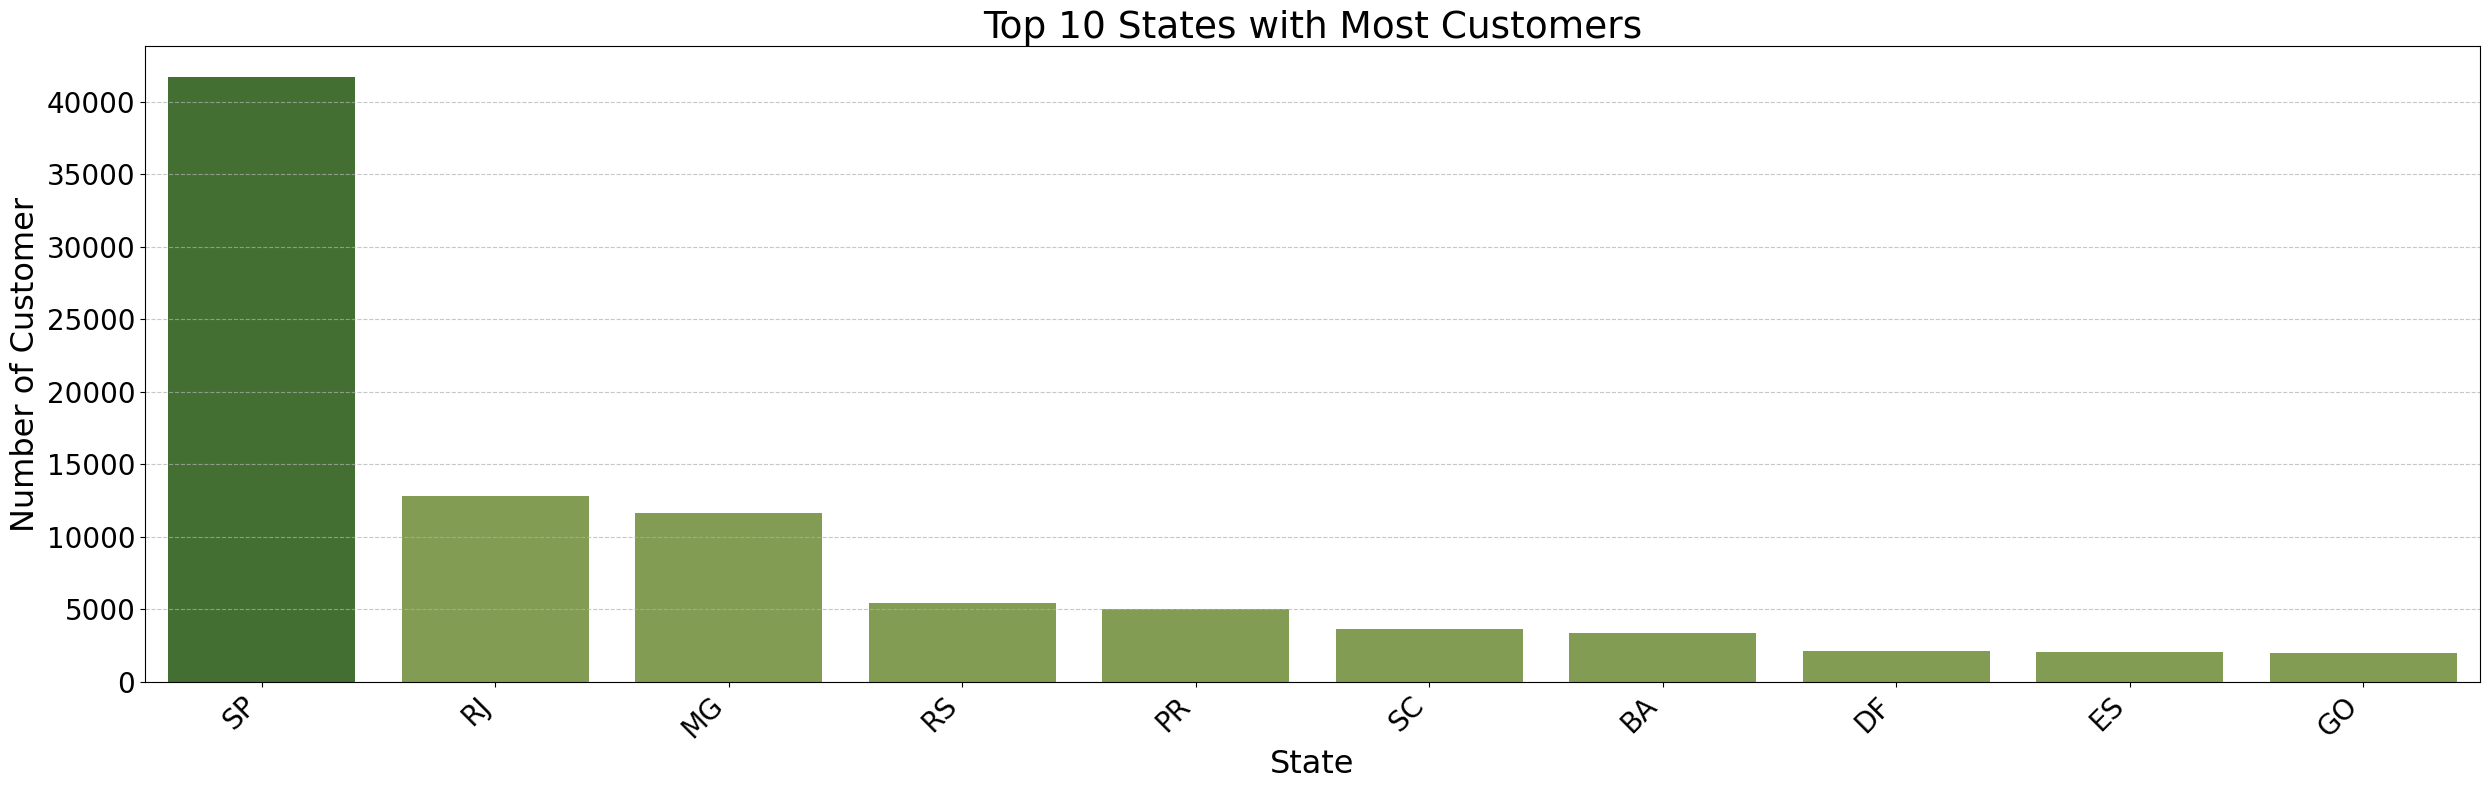

In [75]:
bycustomer_state_df = customer_df.groupby(by="customer_state").customer_id.nunique().reset_index()

bycustomer_state_df.rename(columns={ "customer_id": "customer_count" }, inplace=True)

# Mengambil 10 kota dengan jumlah penjual terbanyak
top_cities = bycustomer_state_df.sort_values(by="customer_count", ascending=False).head(10)

plt.figure(figsize=(25, 8))

colors_ = ["#3E7B27"] + ["#85A947"] * 9

sns.barplot(
    x="customer_state",
    y="customer_count",
    data=top_cities,
    palette=colors_
)

plt.title("Top 10 States with Most Customers", loc="center", fontsize=27)
plt.xlabel("State", fontsize=23)
plt.ylabel("Number of Customer", fontsize=23)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()


### Pertanyaan 2:

Persebaran Seller berdasarkan kota

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_66140\1706028451.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


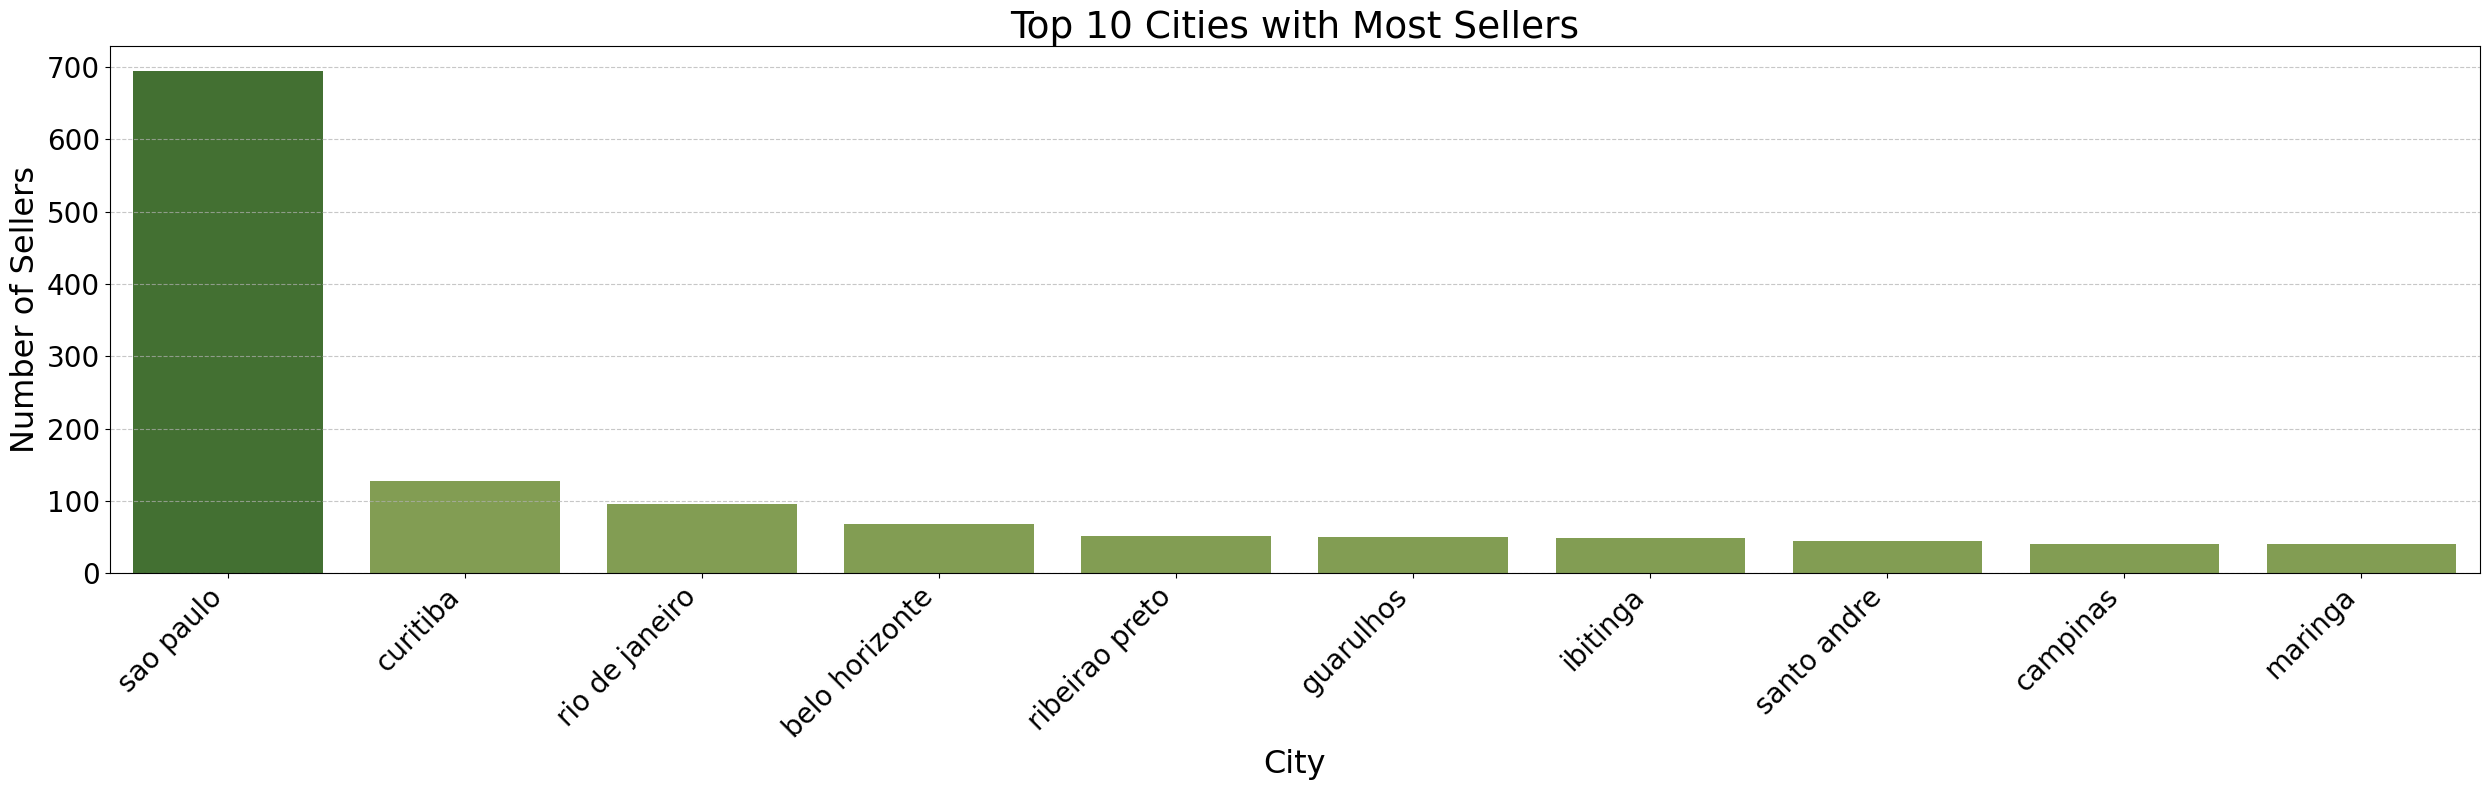

In [72]:
byseller_city_df = seller_df.groupby(by="seller_city").seller_id.nunique().reset_index()

byseller_city_df.rename(columns={ "seller_id": "seller_count" }, inplace=True)

# Mengambil 10 kota dengan jumlah penjual terbanyak
top_cities = byseller_city_df.sort_values(by="seller_count", ascending=False).head(10)

plt.figure(figsize=(25, 8))

colors_ = ["#3E7B27"] + ["#85A947"] * 9

sns.barplot(
    x="seller_city",
    y="seller_count",
    data=top_cities,
    palette=colors_
)

plt.title("Top 10 Cities with Most Sellers", loc="center", fontsize=27)
plt.xlabel("City", fontsize=23)
plt.ylabel("Number of Sellers", fontsize=23)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()

Persebaran seller berdasarkan negara bagian

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_66140\647163322.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


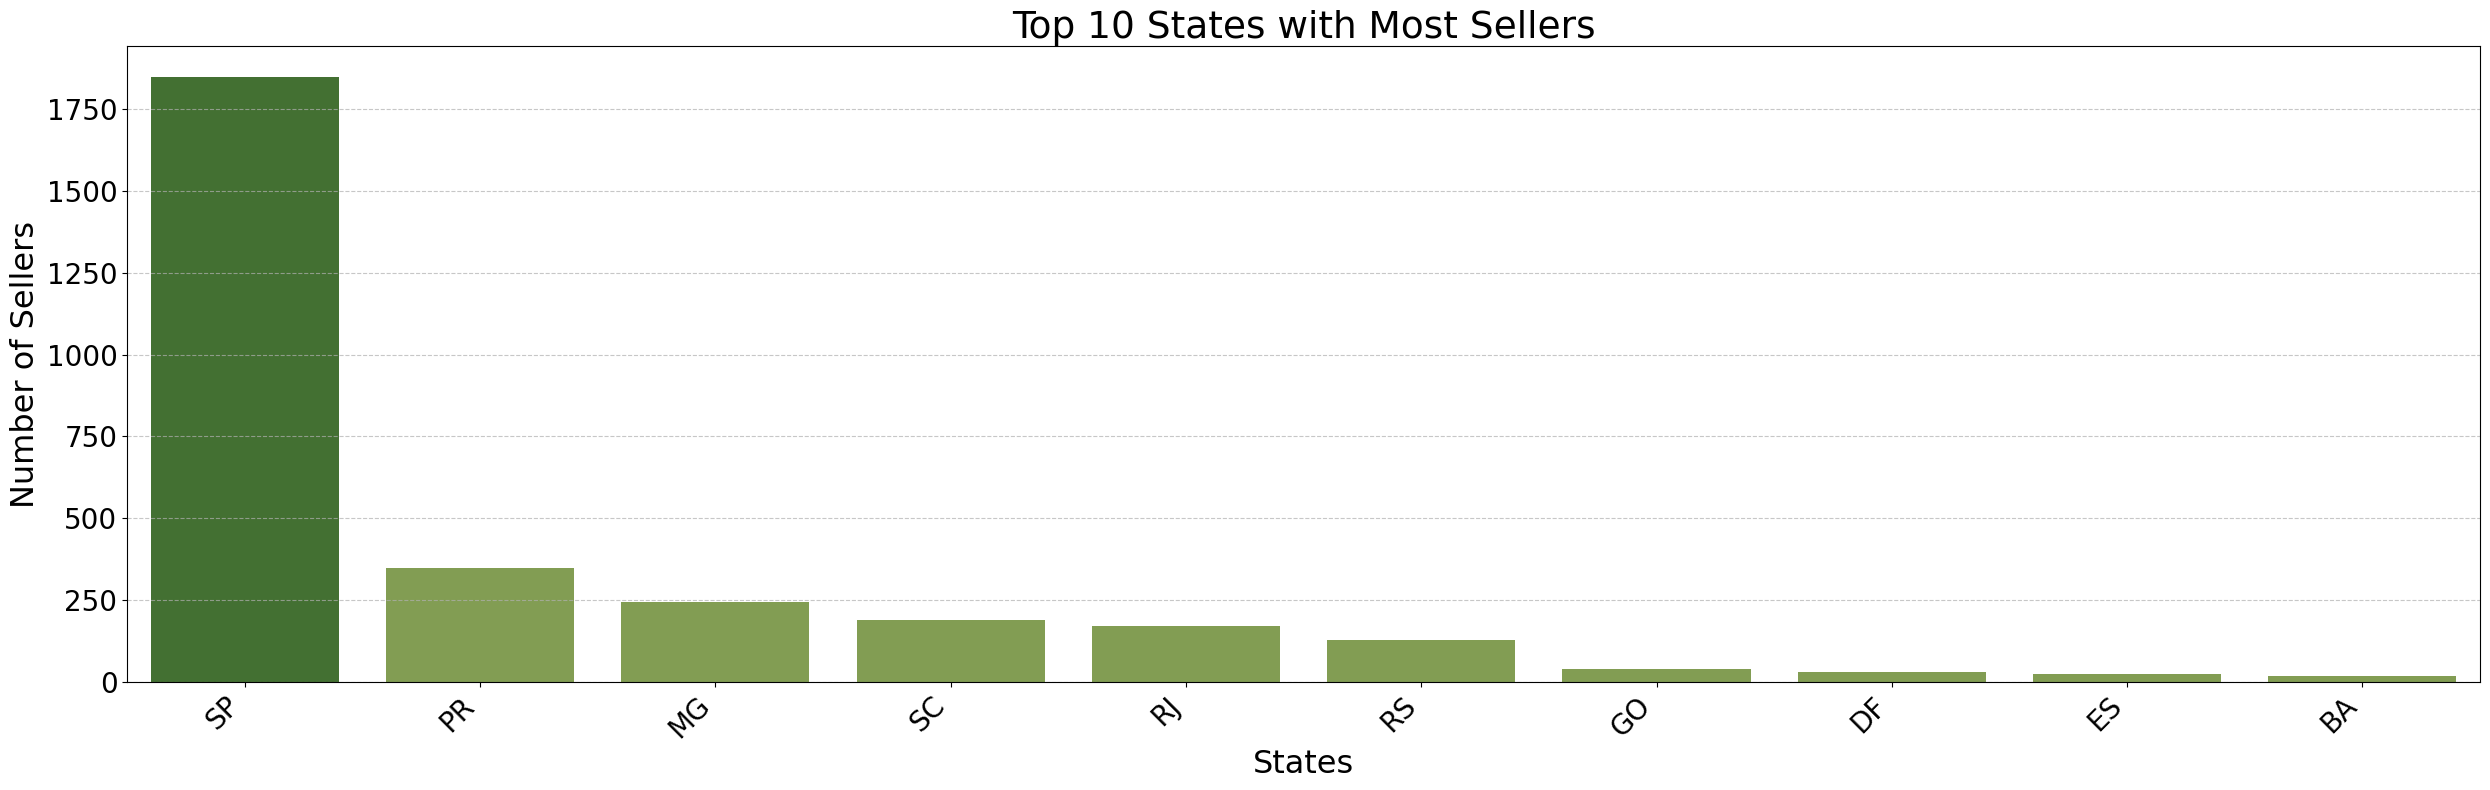

In [73]:
byseller_state_df = seller_df.groupby(by="seller_state").seller_id.nunique().reset_index()

byseller_state_df.rename(columns={ "seller_id": "seller_count" }, inplace=True)

# Mengambil 10 kota dengan jumlah penjual terbanyak
top_cities = byseller_state_df.sort_values(by="seller_count", ascending=False).head(10)

plt.figure(figsize=(25, 8))

colors_ = ["#3E7B27"] + ["#85A947"] * 9

sns.barplot(
    x="seller_state",
    y="seller_count",
    data=top_cities,
    palette=colors_
)

plt.title("Top 10 States with Most Sellers", loc="center", fontsize=27)
plt.xlabel("States", fontsize=23)
plt.ylabel("Number of Sellers", fontsize=23)
plt.xticks(rotation=45, ha="right", fontsize=20)
plt.yticks(fontsize=20)

plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

### Analisis Kepadatan Customer dan Seller

1. Kepadatan Customer dan Seller Terendah dan Tertinggi per State

a. Menghitung Kepadatan per State

In [43]:
df = pd.read_csv('main.csv')

df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_zip_code_prefix,n_customers,seller_zip_code_prefix,n_sellers
0,1037,-23.545621,-46.639292,sao paulo,SP,1037.0,3.0,NaN,0.0
1,1046,-23.546081,-46.644820,sao paulo,SP,1046.0,18.0,NaN,0.0
2,1046,-23.546129,-46.642951,sao paulo,SP,1046.0,18.0,NaN,0.0
3,1041,-23.544392,-46.639499,sao paulo,SP,1041.0,2.0,1041.0,1.0
4,1035,-23.541578,-46.641607,sao paulo,SP,1035.0,7.0,1035.0,1.0


In [57]:
df['customer_density'] = df['n_customers'] / df['n_customers'].sum()
df['seller_density'] = df['n_sellers'] / df['n_sellers'].sum()

b. Mengurutkan Kepadatan Tertinggi dan Terendah per State

In [58]:
# Menghitung total kepadatan pelanggan dan penjual per state
state_density = df.groupby('geolocation_state').agg(
    total_customers=('n_customers', 'sum'),
    total_sellers=('n_sellers', 'sum'),
    customer_density=('customer_density', 'sum'),
    seller_density=('seller_density', 'sum')
).reset_index()

print(state_density)

   geolocation_state  total_customers  total_sellers  customer_density  \
0                 AC           5866.0          111.0          0.000568   
1                 AL          26331.0            0.0          0.002550   
2                 AM           4306.0           16.0          0.000417   
3                 AP           4259.0            0.0          0.000412   
4                 BA         258631.0         1882.0          0.025042   
5                 CE          49722.0          440.0          0.004814   
6                 DF          66197.0          806.0          0.006410   
7                 ES         204715.0         2013.0          0.019822   
8                 GO          98513.0         1978.0          0.009539   
9                 MA          39498.0           74.0          0.003824   
10                MG        2224871.0        48719.0          0.215427   
11                MS          48665.0          345.0          0.004712   
12                MT          93262.0 

In [59]:
# Mengurutkan berdasarkan kepadatan pelanggan tertinggi
highest_customer_density_state = state_density.sort_values(by='customer_density', ascending=False)
lowest_customer_density_state = state_density.sort_values(by='customer_density', ascending=True)

# Mengurutkan berdasarkan kepadatan penjual tertinggi
highest_seller_density_state = state_density.sort_values(by='seller_density', ascending=False)
lowest_seller_density_state = state_density.sort_values(by='seller_density', ascending=True)

# Menampilkan 10 state dengan kepadatan pelanggan tertinggi dan terendah
print("Top 10 States by Customer Density:")
print(highest_customer_density_state[['geolocation_state', 'customer_density']].head(10))

print("Bottom 10 States by Customer Density:")
print(lowest_customer_density_state[['geolocation_state', 'customer_density']].head(10))

# Menampilkan 10 state dengan kepadatan penjual tertinggi dan terendah
print("Top 10 States by Seller Density:")
print(highest_seller_density_state[['geolocation_state', 'seller_density']].head(10))

print("Bottom 10 States by Seller Density:")
print(lowest_seller_density_state[['geolocation_state', 'seller_density']].head(10))


Top 10 States by Customer Density:
   geolocation_state  customer_density
25                SP          0.375582
10                MG          0.215427
18                RJ          0.157850
22                RS          0.058073
17                PR          0.043870
23                SC          0.037964
4                 BA          0.025042
7                 ES          0.019822
8                 GO          0.009539
12                MT          0.009030
Bottom 10 States by Customer Density:
   geolocation_state  customer_density
21                RR          0.000176
3                 AP          0.000412
2                 AM          0.000417
0                 AC          0.000568
26                TO          0.001365
20                RO          0.001411
19                RN          0.001486
24                SE          0.001652
16                PI          0.001757
14                PB          0.002212
Top 10 States by Seller Density:
   geolocation_state  seller_density

2. Menghitung Kepadatan Gabungan per State

In [60]:
# Menghitung kepadatan total per state
state_density['total_density'] = state_density['customer_density'] + state_density['seller_density']

# Mengurutkan berdasarkan kepadatan total tertinggi dan terendah
highest_total_density_state = state_density.sort_values(by='total_density', ascending=False)
lowest_total_density_state = state_density.sort_values(by='total_density', ascending=True)

# Menampilkan 10 state dengan kepadatan total tertinggi dan terendah
print("Top 10 States by Total Density:")
print(highest_total_density_state[['geolocation_state', 'total_density']].head(10))

print("Bottom 10 States by Total Density:")
print(lowest_total_density_state[['geolocation_state', 'total_density']].head(10))


Top 10 States by Total Density:
   geolocation_state  total_density
25                SP       0.914725
10                MG       0.371683
18                RJ       0.221793
17                PR       0.150384
22                RS       0.101689
23                SC       0.100048
4                 BA       0.031079
7                 ES       0.026278
8                 GO       0.015883
12                MT       0.009739
Bottom 10 States by Total Density:
   geolocation_state  total_density
21                RR       0.000176
3                 AP       0.000412
2                 AM       0.000468
0                 AC       0.000924
26                TO       0.001365
16                PI       0.001770
24                SE       0.001874
19                RN       0.001923
20                RO       0.001963
1                 AL       0.002550


### Visualisasi

1. Visualisasi Bar Plot untuk Kepadatan Customer dan Seller

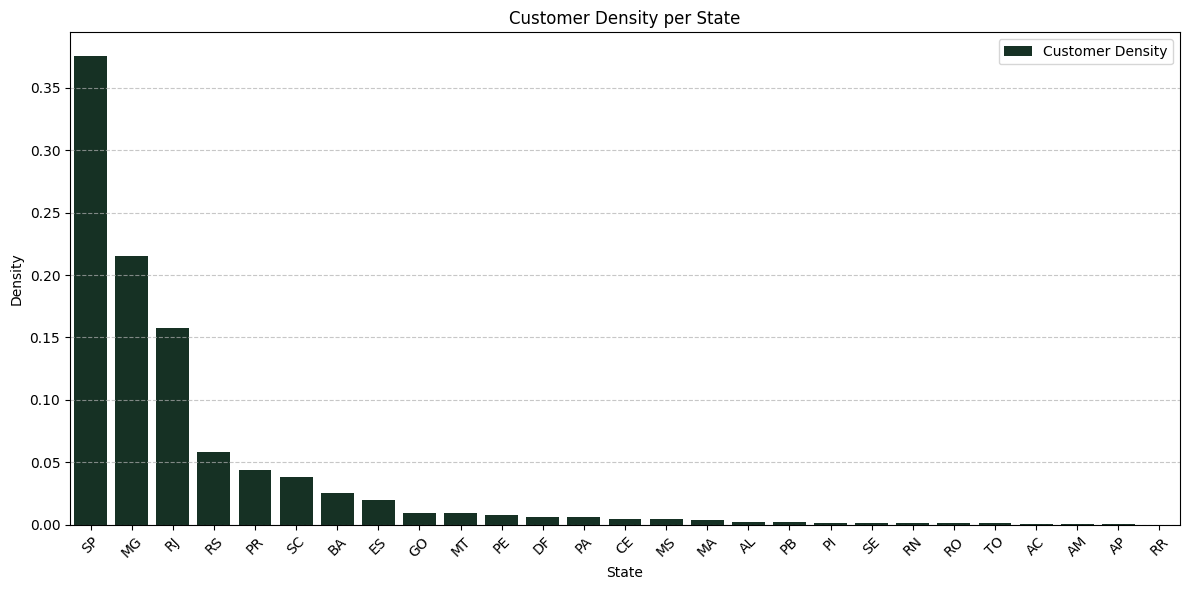

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengurutkan data berdasarkan kepadatan customer
state_density_sorted = state_density.sort_values(by='customer_density', ascending=False)

# Membuat visualisasi barplot
plt.figure(figsize=(12, 6))

sns.barplot(data=state_density_sorted, x='geolocation_state', y='customer_density', color='#123524', label='Customer Density')

plt.title('Customer Density per State')
plt.xlabel('State')
plt.ylabel('Density')
plt.legend()
plt.xticks(rotation=45)  # Memiringkan label sumbu x agar mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


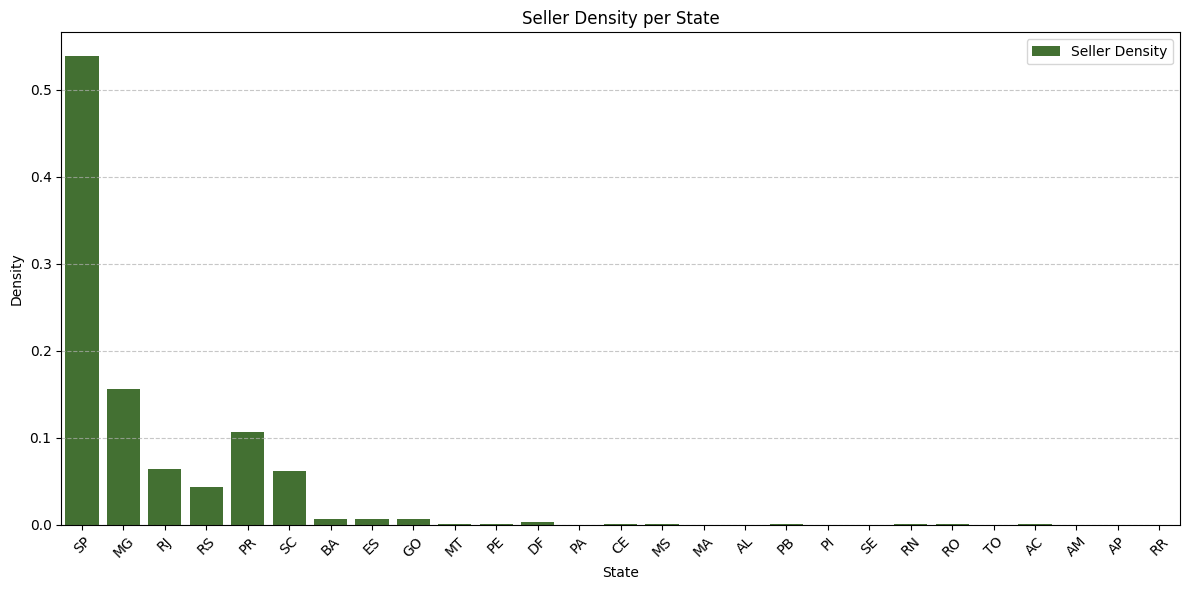

In [69]:
# Mengurutkan data berdasarkan kepadatan customer
state_density_sorted = state_density.sort_values(by='customer_density', ascending=False)

# Membuat visualisasi barplot
plt.figure(figsize=(12, 6))

sns.barplot(data=state_density_sorted, x='geolocation_state', y='seller_density', color='#3E7B27', label='Seller Density')

plt.title('Seller Density per State')
plt.xlabel('State')
plt.ylabel('Density')
plt.legend()
plt.xticks(rotation=45)  # Memiringkan label sumbu x agar mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


2. Visualisasi HeatMap untuk Kepadatan Total

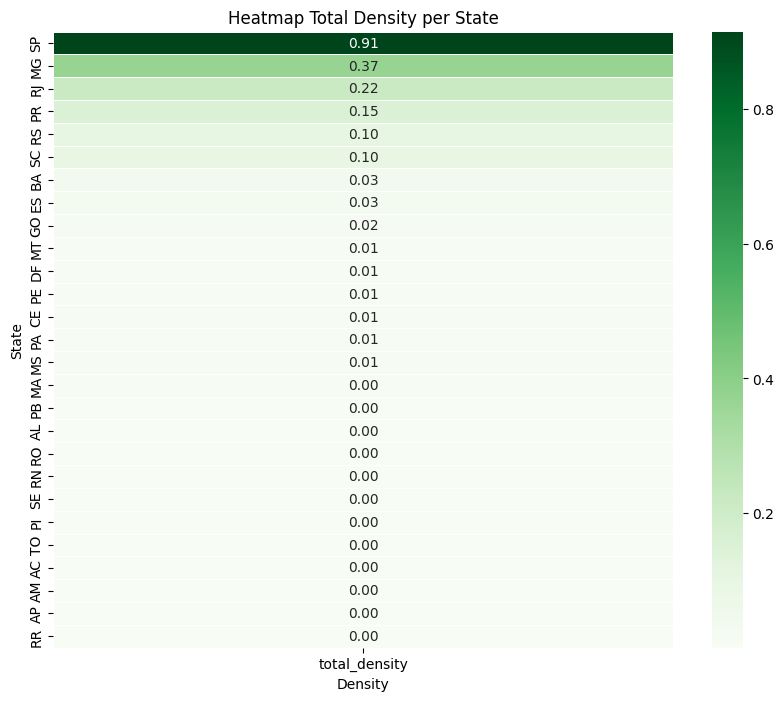

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur data untuk heatmap
heatmap_data = state_density[['geolocation_state', 'total_density']]
heatmap_data = heatmap_data.sort_values(by='total_density', ascending=False)  # Mengurutkan data
heatmap_data = heatmap_data.set_index('geolocation_state')  # Mengatur state sebagai indeks

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="Greens", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Heatmap Total Density per State')
plt.xlabel('Density')
plt.ylabel('State')
plt.show()


## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2